In [1]:
%matplotlib inline

In [2]:
%%capture

%run ../path_manager.ipynb

In [3]:
import pandas as pd

In [4]:
with open(os.path.join(get_txt_orig_path('WB'), 'wb_10000577.txt'), 'rb') as fl:
    text = fl.read().decode('utf-8', errors='ignore')

In [5]:
snippet = text # [:5000]
print(snippet)

                                                    WPS4770


Policy ReseaRch WoRking PaPeR                      4770




                 Crises, Capital Controls,
                 and Financial Integration

                              Eduardo Levy Yeyati
                              Sergio L. Schmukler
                               Neeltje Van Horen




The World Bank
Development Economics Research Group
November 2008

Policy ReseaRch WoRking PaPeR 4770


 Abstract

 This paper analyzes the effects of capital controls and                              put downward pressure on domestic markets relative to
 crises on international financial integration, using data on                         international ones, generating a negative premium. The
 stocks from emerging economies that trade in domestic                                opposite happens with controls on capital outflows. This
 and international markets. The cross-market premium                                  signals the 

In [6]:
import re

In [7]:
ttext = re.sub('[0-9]+', '', text)
ttext = re.sub('\s\s+', ' ', ttext).strip()

In [8]:
ttext[:500]

'WPS Policy ReseaRch WoRking PaPeR Crises, Capital Controls, and Financial Integration Eduardo Levy Yeyati Sergio L. Schmukler Neeltje Van Horen The World Bank Development Economics Research Group November Policy ReseaRch WoRking PaPeR Abstract This paper analyzes the effects of capital controls and put downward pressure on domestic markets relative to crises on international financial integration, using data on international ones, generating a negative premium. The stocks from emerging economies'

In [9]:
import spacy

nlp = spacy.load("en_core_web_sm")
doc = nlp(ttext)

sents = [sent.text for sent in doc.sents]
print(len(sents))

# for ix, i in enumerate(sents):
#     print(f'{ix}\t {i}')

709


In [10]:
pd.Series([len(i.split()) for i in sents]).describe()

count    709.000000
mean      15.361072
std       12.285767
min        1.000000
25%        4.000000
50%       13.000000
75%       23.000000
max       62.000000
dtype: float64

In [11]:
from bert_serving.client import BertClient
bc = BertClient()

In [12]:
%%time
embs = bc.encode(sents)

/home/wb536061/anaconda3/envs/wb-nlp/lib/python3.7/site-packages/bert_serving/client/__init__.py:299: UserWarning: some of your sentences have more tokens than "max_seq_len=25" set on the server, as consequence you may get less-accurate or truncated embeddings.
here is what you can do:
- disable the length-check by create a new "BertClient(check_length=False)" when you do not want to display this warning
- or, start a new server with a larger "max_seq_len"
  '- or, start a new server with a larger "max_seq_len"' % self.length_limit)


CPU times: user 2.28 ms, sys: 4.23 ms, total: 6.51 ms
Wall time: 4.71 s


In [13]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

In [14]:
qnum = 4
qv = embs[qnum - 1].reshape(1, -1)

In [15]:
for ix, (i, s) in enumerate(sorted(zip(sents, cosine_similarity(qv, embs)[0]), key=lambda x: -x[1])[:15]):
    print(f'{ix + 1}. {i} :: {s}')

1. This paper analyzes the effects of capital controls and put downward pressure on domestic markets relative to crises on international financial integration, using data on international ones, generating a negative premium. :: 1.000000238418579
2. In this paper, we analyze the effects of capital controls and crises on the integration of emerging economies with the international financial system. :: 0.982118546962738
3. In that paper, we study the effects of capital controls and liquidity on the cross-market premium and analyze the advantages of this measure of financial integration over alternative ones. :: 0.9767184853553772
4. Effects of Capital Controls To examine the impact of capital controls on financial market integration we perform event studies on a stock level basis. :: 0.9756158590316772
5. Section analyzes the effects of capital controls on the cross- market premium. :: 0.9754534363746643
6. Effects of Crises As in the case of capital controls, we examine the impact of cri

In [16]:
qnum = 1
qv = embs[qnum - 1].reshape(1, -1)

for ix, (i, s) in enumerate(sorted(zip(sents, cosine_similarity(qv, embs)[0]), key=lambda x: -x[1])[:15]):
    print(f'{ix + 1}. {i} :: {s}')

1. WPS Policy ReseaRch WoRking PaPeR Crises, Capital Controls, and Financial Integration Eduardo Levy Yeyati Sergio L. Schmukler Neeltje Van Horen :: 1.0
2. Produced by the Research Support Team Crises, Capital Controls, and Financial Integration Eduardo Levy Yeyati Sergio :: 0.9892693758010864
3. International Borrowing, Capital Controls, and the Exchange Rate: Lessons from Chile," NBER Working Paper No. and Working Paper Central Bank of Chile No. . :: 0.972597599029541
4. The Unremunerated Reserve Requirement and Net Capital Flows: Chile in the s," CEPAL Review, vol. , :: 0.9705650806427002
5. *Levy Yeyati is with Barclays Capital and the Barcelona Graduate School of Economics; Schmukler is with the World Bank; Van Horen is with the Dutch Central Bank and the University of Amsterdam. :: 0.9675834774971008
6. "Capital Controls During Financial Crises: the Case of Malaysia and Thailand," in Financial Crises in Emerging Markets, R. Glick, R. Moreno, and M. Spiegel (Eds.), Cambridge Univ

In [17]:
from sklearn.manifold import TSNE
import pandas as pd

In [26]:
%%time
tsne = TSNE(n_components=2, perplexity=50, n_iter=2000, metric='euclidean')  # 'cosine')
tembs = tsne.fit_transform(embs)

CPU times: user 7.43 s, sys: 2.75 ms, total: 7.43 s
Wall time: 7.43 s


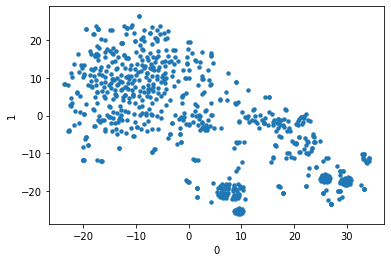

In [27]:
tembs = pd.DataFrame(tembs)
tembs.plot(kind='scatter', x=0, y=1, linewidth=0.001)